# Titrage suivi par pH-métrie

## Titrage d'une solution aqueuse d'acide éthanoïque par une solution aqueuse d'hydroxyde de sodium

In [1]:
# Import des bibliothèques 

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats

In [2]:
Vb = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,12.2,12.4,12.6,12.8,13,13.2,13.4,
              13.6,13.8,14,14.2,14.4,14.6,14.8,15,16,17,18,19,20,21,22,23,24,25])

pH = np.array([3.21,3.60,3.88,4.07,4.24,4.38,4.51,4.64,4.78,4.93,5.11,5.28,5.60,5.69,5.78,
               5.95,6.03,6.28,6.75,7.08,9.32,10.26,10.68,10.83,10.94,11.1,11.17,
      11.29,11.47,11.60,11.70,11.83,11.90,11.95,12.00,12.02,12.08,12.10])

In [3]:
def derivee(x,y):
    dery=[]
    for i in range (len(x)-1):
        deryi=(y[i+1]-y[i])/(x[i+1]-x[i])
        dery.append(deryi)
    return dery

In [4]:
derpH=derivee (Vb,pH)
print (derpH)

[0.3900000000000001, 0.2799999999999998, 0.1900000000000004, 0.16999999999999993, 0.13999999999999968, 0.1299999999999999, 0.1299999999999999, 0.14000000000000057, 0.14999999999999947, 0.1800000000000006, 0.16999999999999993, 0.3199999999999994, 0.45000000000000534, 0.4499999999999969, 0.8500000000000026, 0.39999999999999825, 1.2500000000000044, 2.350000000000007, 1.6499999999999915, 11.20000000000004, 4.699999999999973, 2.100000000000007, 0.7500000000000044, 0.5499999999999943, 0.8000000000000036, 0.34999999999999953, 0.5999999999999982, 0.1800000000000015, 0.129999999999999, 0.09999999999999964, 0.13000000000000078, 0.07000000000000028, 0.049999999999998934, 0.05000000000000071, 0.019999999999999574, 0.0600000000000005, 0.019999999999999574]


In [5]:
# Suppression de la dernière valeur du tableau à cause de l'affichage de la courbe de la dérivée 
Vb = np.delete(Vb,-1)     
pH = np.delete(pH,-1)

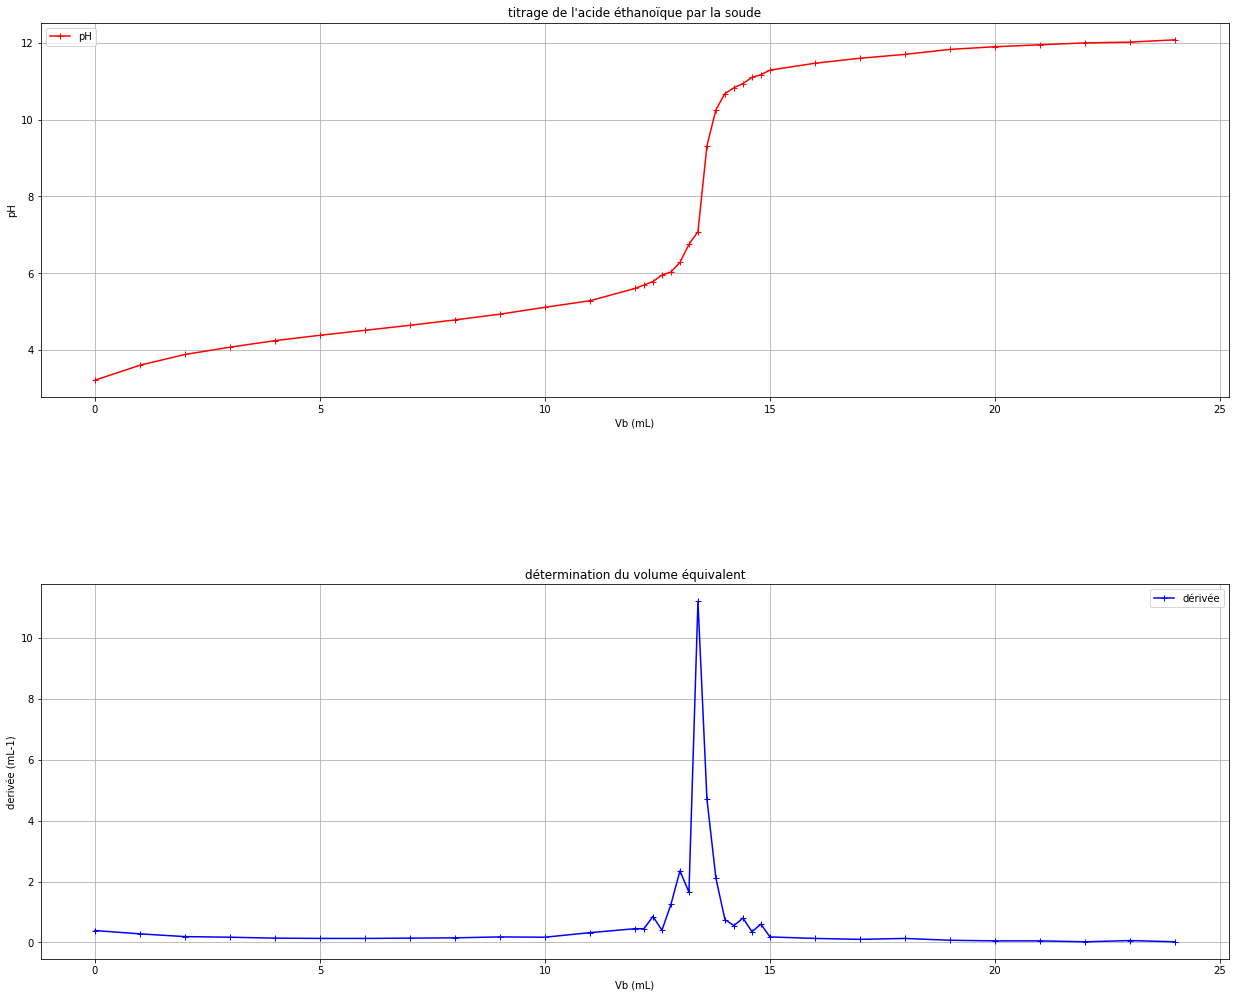

In [6]:
plt.figure(figsize=(12,10))
plt.gcf().subplots_adjust(left =0.125, bottom = 0.2, right = 1.5, top = 1.5, wspace = 0.5, hspace = 0.5)
plt.subplot(2,1,1)
plt.plot(Vb,pH,"r+-", label="pH")
plt.xlabel("Vb (mL)")
plt.ylabel("pH")
plt.grid()
plt.title("titrage de l'acide éthanoïque par la soude")
plt.legend()
plt.subplot(2,1,2)
plt.plot(Vb,derpH,"b+-",label="dérivée")
plt.xlabel("Vb (mL)")
plt.ylabel("derivée (mL-1)")
plt.grid()
plt.title("détermination du volume équivalent")
plt.legend()
plt.show()

In [7]:
# détermination du volume équivalent

Vbe = Vb[(derpH.index(max(derpH)))]
print ("Vbe=",Vbe,"mL")

Vbe= 13.4 mL


In [8]:
# Evolution des quantités de matières des réactifs et prduits dans le vase réactionnel
cb = 0.1  # concentration de la solution titrante d'hydroxyde de sodium
na=np.array([])
nb=np.array([])
nc=np.array([])
for i in range (len(Vb)):
    if Vb[i]<=Vbe:
        nai = cb*Vbe-cb*Vb[i]   # qté de matière d'acide éthanoïque en mmol
        nbi = 0                 # qté de matière des ions hydroxyde en mmol
        nci = cb*Vb[i]          # qté de matière des ions éthanoate en mmol
        na = np.append(na,nai)
        nb = np.append(nb,nbi)
        nc = np.append(nc,nci)
    else:
        nai = 0                 # qté de matière d'acide éthanoïque en mmol
        nbi = cb*(Vb[i]-Vbe)       # qté de matière des ions hydroxyde en mmol
        nci = cb*Vbe            # qté de matière des ions éthanoate en mmol
        na = np.append(na,nai)
        nb = np.append(nb,nbi)
        nc = np.append(nc,nci)
print (na)
print (nb)
print (nc)
    
    

[1.34 1.24 1.14 1.04 0.94 0.84 0.74 0.64 0.54 0.44 0.34 0.24 0.14 0.12
 0.1  0.08 0.06 0.04 0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16
 0.26 0.36 0.46 0.56 0.66 0.76 0.86 0.96 1.06]
[0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.22
 1.24 1.26 1.28 1.3  1.32 1.34 1.34 1.34 1.34 1.34 1.34 1.34 1.34 1.34
 1.34 1.34 1.34 1.34 1.34 1.34 1.34 1.34 1.34]


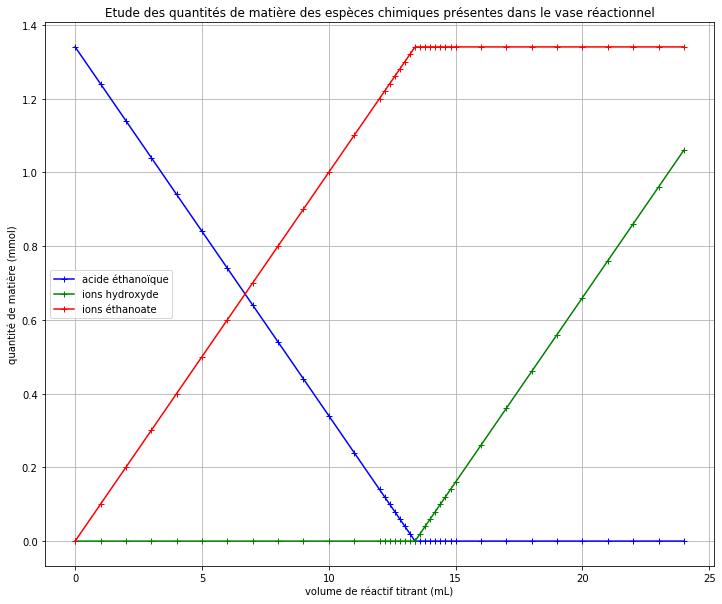

In [9]:
plt.figure(figsize=(12,10))
plt.plot(Vb,na,"b+-",label="acide éthanoïque")
plt.plot(Vb,nb,"g+-",label="ions hydroxyde")
plt.plot(Vb,nc,"r+-",label="ions éthanoate")
plt.xlabel("volume de réactif titrant (mL)")
plt.ylabel("quantité de matière (mmol)")
plt.title("Etude des quantités de matière des espèces chimiques présentes dans le vase réactionnel")
plt.legend()
plt.grid()
plt.show()
